In [ ]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

pytrends = TrendReq(hl='en-US',retries=3)

all_keywords = ['ganjar', 'anies', 'prabowo']
keywords = []

timeframes = ['today 5-y', 'today 12-m', 'today 3-m', 'today 1-m']

# it has to be strings
cat = '0'
# geo=ID
geo = 'ID'
# Can be images, news, youtube or froogle (for Google Shopping results)
gprop = ''

def trends(keyword):
    pytrends.build_payload([keyword],
                           cat=cat,
                           timeframe=timeframes[2],
                           geo=geo,
                           gprop=gprop)

    data = pytrends.interest_over_time()
    return data

# Create an empty dictionary to store dataframes
dataframes_dict = {}

for kw in all_keywords:
    keywords.append(kw)
    data = trends(kw)
    dataframes_dict[kw] = data
    keywords.pop()

# Access the dataframes using the keywords as keys
ganjar_dataframe = dataframes_dict['ganjar']
anies_dataframe = dataframes_dict['anies']
prabowo_dataframe = dataframes_dict['prabowo']


In [ ]:
import pandas as pd


dataframes = [ganjar_dataframe.drop('isPartial',axis=1), anies_dataframe.drop('isPartial',axis=1), prabowo_dataframe.drop('isPartial',axis=1)]

df = pd.concat(dataframes,axis=1)

df.to_csv('data.csv')


<Axes: xlabel='ganjar', ylabel='anies'>

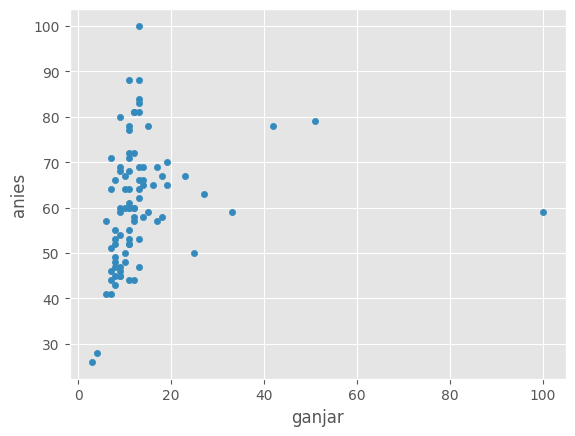

In [ ]:
df.plot(kind='scatter',x='ganjar',y='anies')

<Axes: xlabel='prabowo', ylabel='anies'>

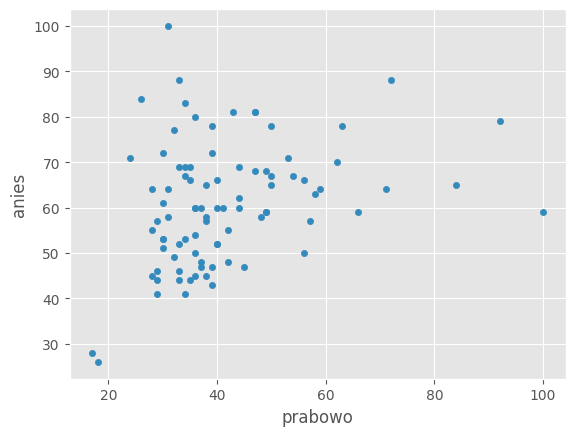

In [ ]:
df.plot(kind='scatter',x='prabowo',y='anies')

<Axes: xlabel='prabowo', ylabel='ganjar'>

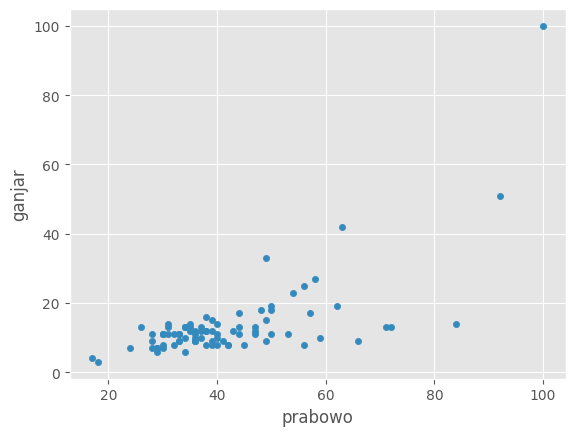

In [ ]:
df.plot(kind='scatter',x='prabowo',y='ganjar')

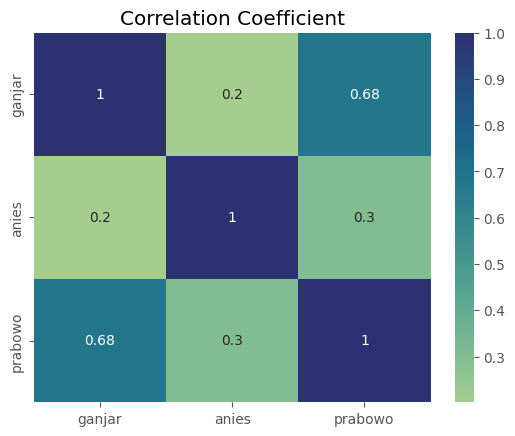

In [ ]:
import seaborn as sns

ax = sns.heatmap(df.corr(),annot=True,cmap="crest")
ax.set_title('Correlation Coefficient')
plt.savefig('Correlation Coefficient.png')

In [ ]:
df.index.min() - df.index.max()

Timedelta('-87 days +00:00:00')

In [ ]:
df.index.min()

Timestamp('2023-04-19 00:00:00')

In [ ]:
df.index.max()

Timestamp('2023-07-15 00:00:00')

In [ ]:
df.ganjar.sort_values(ascending=False).head()

date
2023-04-21    100
2023-04-22     51
2023-04-23     42
2023-04-24     33
2023-04-26     27
Name: ganjar, dtype: int64

In [ ]:
df.prabowo.sort_values(ascending=False).head()

date
2023-04-21    100
2023-04-22     92
2023-05-20     84
2023-05-21     72
2023-05-19     71
Name: prabowo, dtype: int64

In [ ]:
df.anies.sort_values(ascending=False).head()

date
2023-05-07    100
2023-05-21     88
2023-05-08     88
2023-06-03     84
2023-06-04     83
Name: anies, dtype: int64

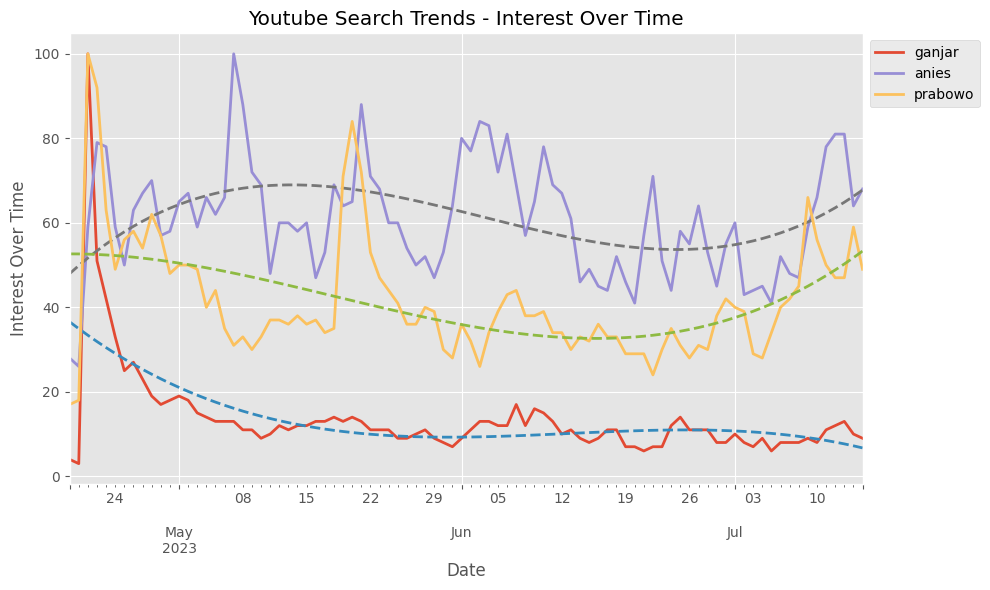

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for keyword in all_keywords:
    keyword_data = df[keyword]
    keyword_data.plot(ax=ax, label=keyword, linewidth=2)

    coeffs = np.polyfit(range(len(keyword_data)), keyword_data, 3)
    trend_line = np.polyval(coeffs, range(len(keyword_data)))
    ax.plot(keyword_data.index, trend_line, linestyle='dashed', linewidth=2)

ax.set_xlabel('Date')
ax.set_ylabel('Interest Over Time')
ax.set_title('Youtube Search Trends - Interest Over Time')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)

plt.tight_layout()
plt.savefig('trends_chart.png')
plt.show()


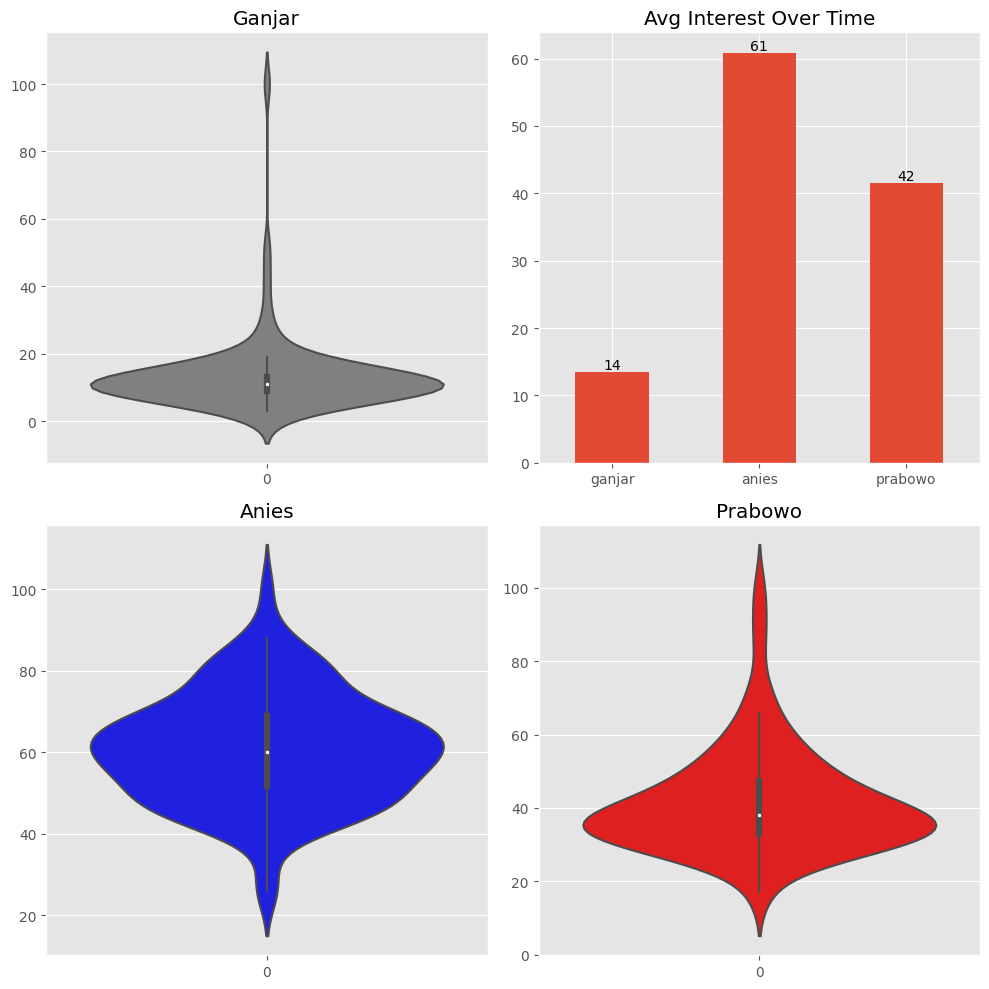

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
sns.violinplot(df.ganjar,ax=ax[0,0],color='grey')
ax[0,0].set_title('Ganjar')
sns.violinplot(df.anies,ax=ax[1,0],color='blue')
ax[1,0].set_title('Anies')
sns.violinplot(df.prabowo,ax=ax[1,1],color='red')
ax[1,1].set_title('Prabowo')
df.mean().plot(kind='bar',ax=ax[0,1],rot=0)
ax[0,1].bar_label(ax[0,1].containers[0], fmt='%.0f')
ax[0,1].set_title('Avg Interest Over Time')
plt.savefig('dist.png')

plt.tight_layout()
plt.show()

In [ ]:
df.ganjar.std()

11.665845619713494

In [ ]:
df.anies.std()

13.448530896759197

In [ ]:
df.prabowo.std()

14.49497715042806

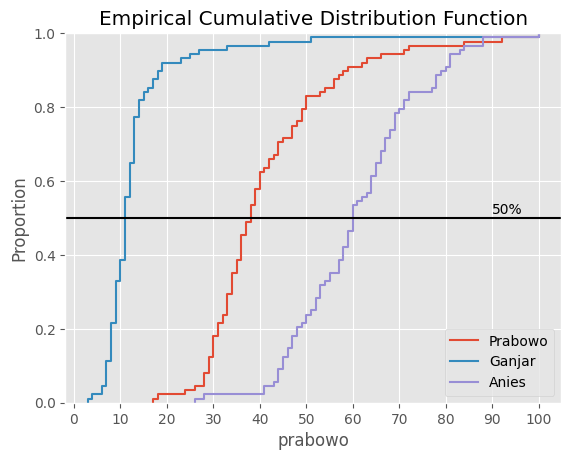

In [ ]:
sns.ecdfplot(x='prabowo',data=df,label='Prabowo')
sns.ecdfplot(x='ganjar',data=df,label='Ganjar')
sns.ecdfplot(x='anies',data=df,label='Anies')
plt.legend()
plt.axhline(0.5,c='black')
plt.title('Empirical Cumulative Distribution Function')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.text(x=90,y=0.51,s='50%')
plt.savefig('ecdf_chart.png')
plt.show()
